# House price prediction using advanced regression techniques
### Exploratory analysis on the 'train' data to understand the dataset

This assists in better understanding of data for Feature engineering and selection.

#### Analysis methodology to find below items
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Outliers
5. Categorical Variables
6. Cardinality of Categorical Variables
7. Temporal variables (Datetime)

###### We'll also be looking at the Relationship between independent and dependent feature(SalePrice)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

In [3]:
housing_data = pd.read_csv('train.csv')
housing_data.shape

(1460, 81)

The dataset has 81 columns. There needs to be due diligence in understanding which columns actually affect the dependent variable

##### 1. Missing Values

In [4]:
# Let's get the features with null values (NaN)
feature_with_na = [feature for feature in housing_data.columns if housing_data[feature].isnull().sum()>1]

# Percentage of null values in each feature
for feature in feature_with_na:
    print(feature, np.round(housing_data[feature].isnull().mean(), 4), '% missing values')

LotFrontage 0.1774 % missing values
Alley 0.9377 % missing values
MasVnrType 0.0055 % missing values
MasVnrArea 0.0055 % missing values
BsmtQual 0.0253 % missing values
BsmtCond 0.0253 % missing values
BsmtExposure 0.026 % missing values
BsmtFinType1 0.0253 % missing values
BsmtFinType2 0.026 % missing values
FireplaceQu 0.4726 % missing values
GarageType 0.0555 % missing values
GarageYrBlt 0.0555 % missing values
GarageFinish 0.0555 % missing values
GarageQual 0.0555 % missing values
GarageCond 0.0555 % missing values
PoolQC 0.9952 % missing values
Fence 0.8075 % missing values
MiscFeature 0.963 % missing values


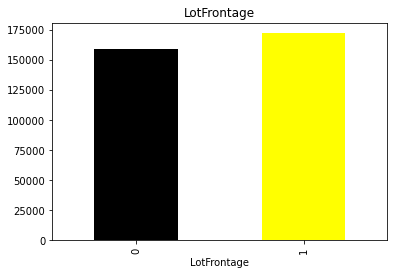

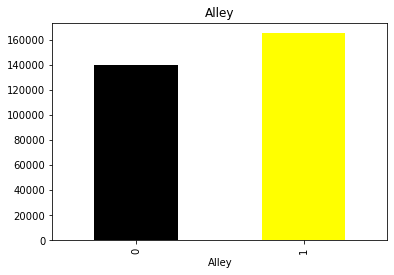

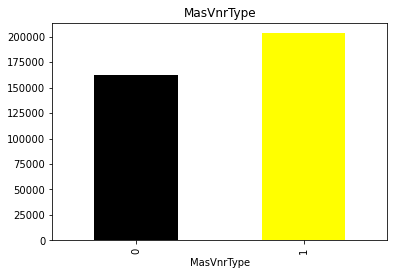

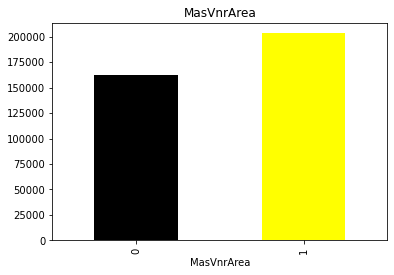

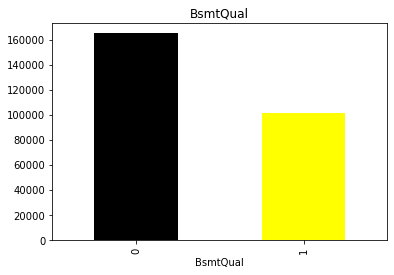

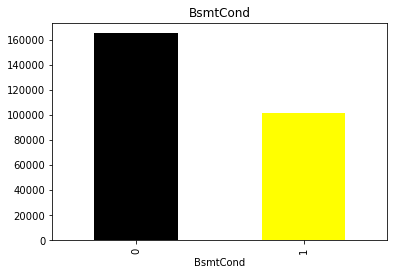

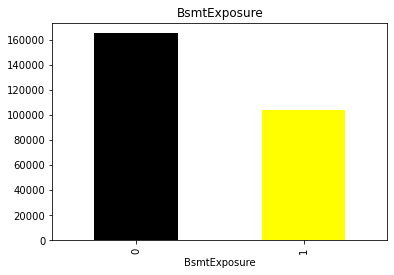

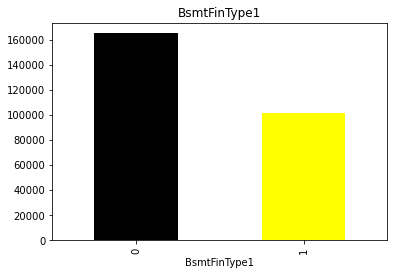

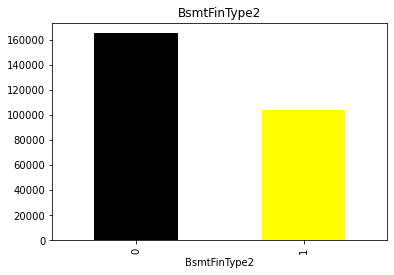

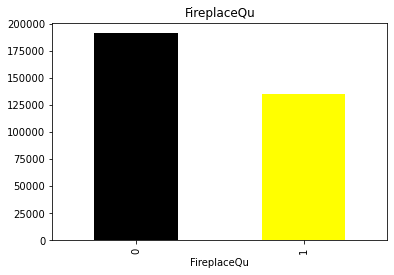

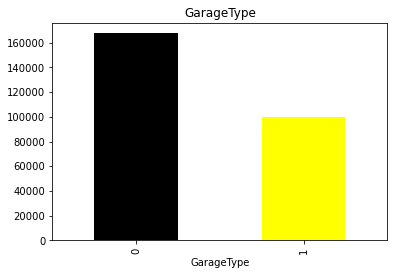

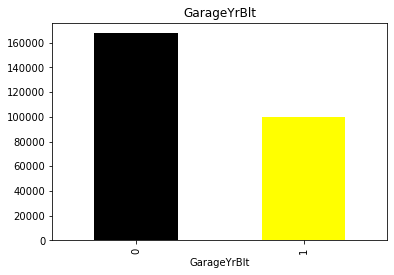

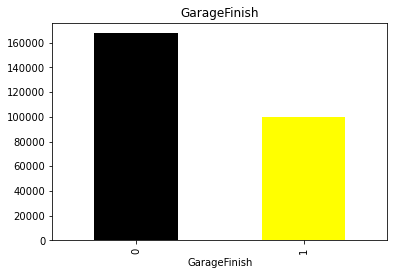

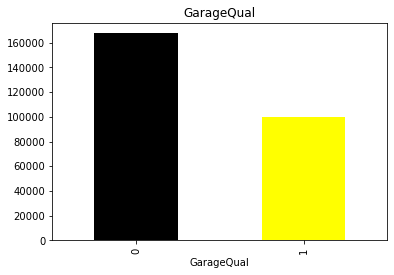

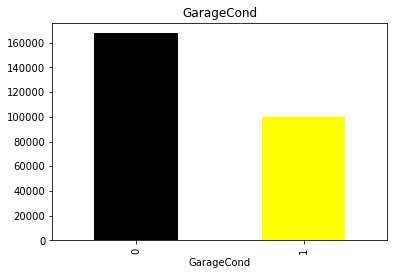

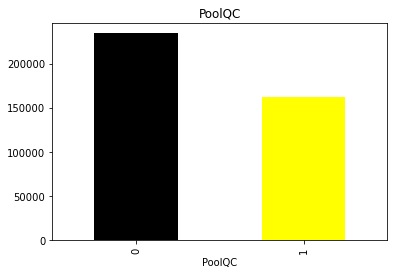

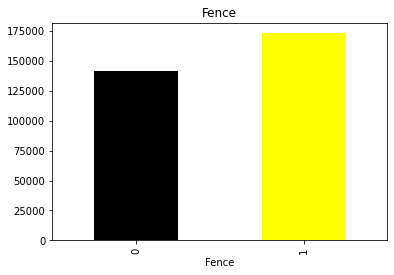

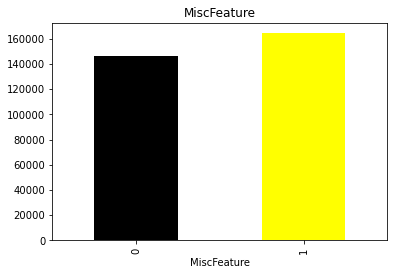

In [5]:
# Does these features with missing values have any impact on the dependent variable ? ('SalePrice')
# Let's check the data to get an answer

for feature in feature_with_na:
    house_data = housing_data.copy()

    house_data[feature] = np.where(house_data[feature].isnull(), 1, 0)

    house_data.groupby(feature)['SalePrice'].median().plot.bar(color=['black','yellow'])
    plt.title(feature)
    plt.show()

It can be seen that the features which have null values have significant effect on the dependent variable.
Hence, this needs to be dealt appropriately in Feature engineering

##### 2. Numerical features

In [6]:
# Getting numerical features of the dataset housing_data

numerical_feature = [feature for feature in housing_data.columns if housing_data[feature].dtype != 'O']
print('Number of numerical features: {}'.format(len(numerical_feature)))

housing_data[numerical_feature].head()

Number of numerical features: 38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


There are Columns that has Years mentioned in the data. For example the column 'YearBuilt'. 
Let us get a separate list of these features.

In [7]:
# Getting features with years mentioned in the data

year_feature = [feature for feature in numerical_feature if 'Year' in feature or 'Yr' in feature]
print('Features with Years: {}'.format(year_feature))
housing_data[year_feature].dtypes

Features with Years: ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


YearBuilt         int64
YearRemodAdd      int64
GarageYrBlt     float64
YrSold            int64
dtype: object

GarageYrBlt is float64. This needs to be converted to int64 as we'll neither have decimals not have number longer than 4 digits.

##### 3. Distribution of Numerical features (Discrete and Continous)

In [8]:
# Get numerical features that are discrete

discrete_feature = [feature for feature in numerical_feature if len(housing_data[feature].unique())<20 and feature not in year_feature+['Id']]
print('Number of discrete numerical features: {}'.format(len(discrete_feature)))

housing_data[discrete_feature].head()

Number of discrete numerical features: 14


,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold
0,60,7,5,1,0,2,1,3,1,8,0,2,0,2
1,20,6,8,0,1,2,0,3,1,6,1,2,0,5
2,60,7,5,1,0,2,1,3,1,6,1,2,0,9
3,70,7,5,1,0,1,0,3,1,7,1,3,0,2
4,60,8,5,1,0,2,1,4,1,9,1,3,0,12


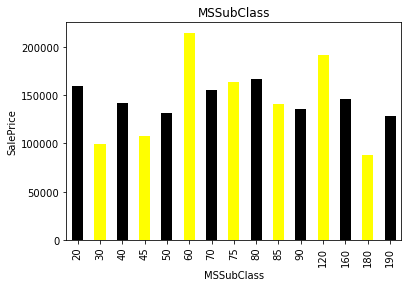

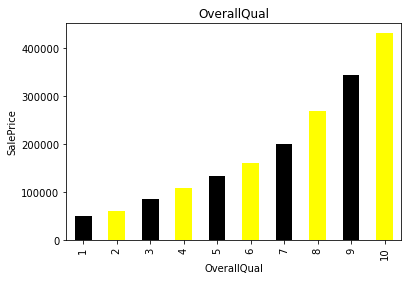

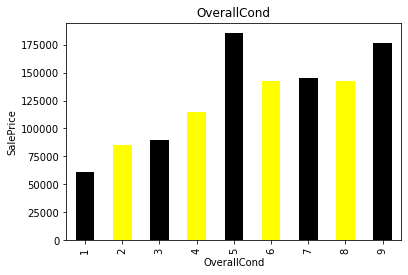

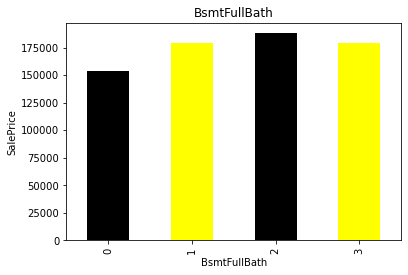

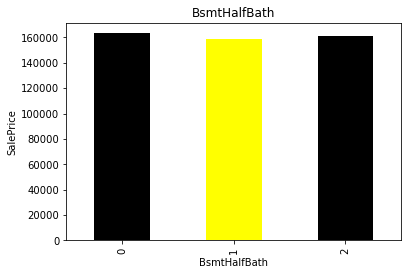

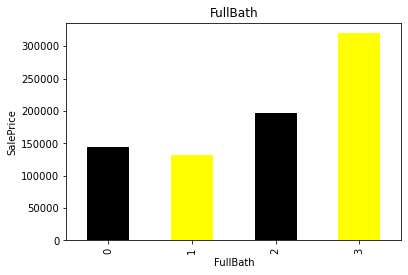

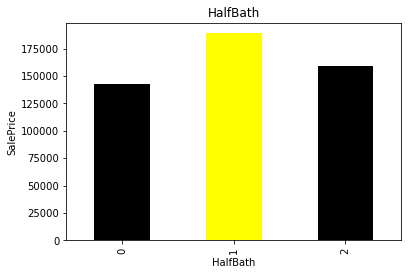

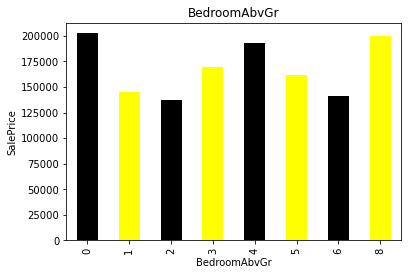

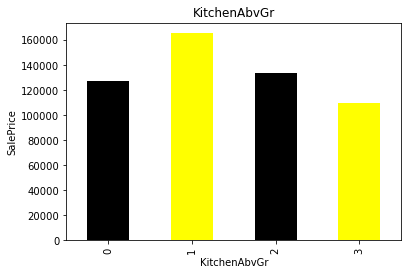

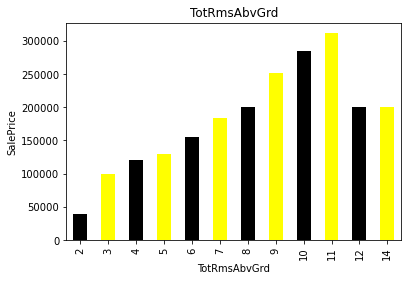

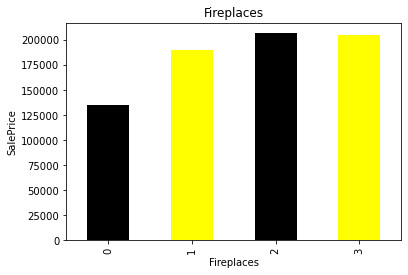

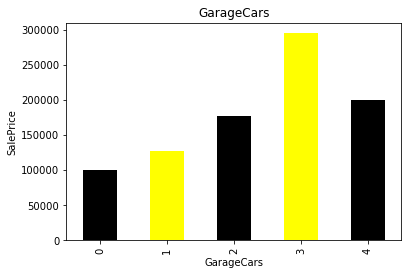

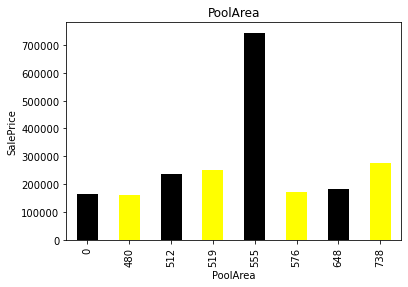

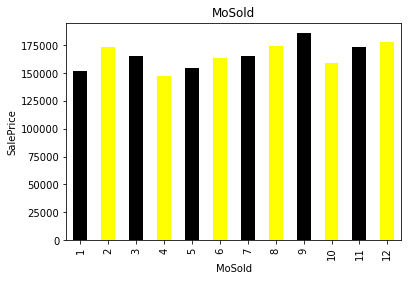

In [9]:
# Does this have relationship with the dependent varaible ?

for feature in discrete_feature:
    house_data=housing_data.copy()
    house_data.groupby(feature)['SalePrice'].median().plot.bar(color=['Black','Yellow'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

There are relationships between the discrete numerical features and the 'SalePrice'.

In [10]:
# Let's get the continous numerical features

continous_features = [feature for feature in numerical_feature if feature not in discrete_feature+year_feature+['Id']]
print('Number of features with Continous features: {}'.format(len(continous_features)))

housing_data[continous_features].head()

Number of features with Continous features: 19


,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,250000


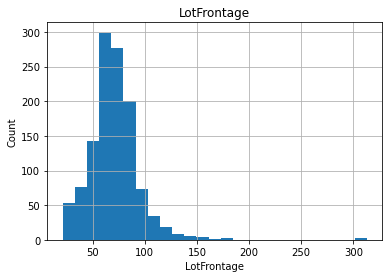

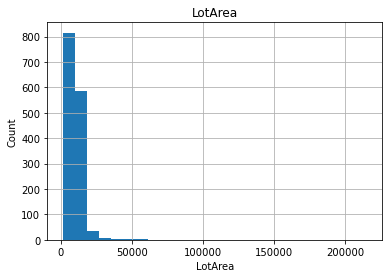

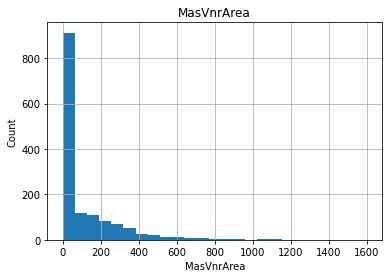

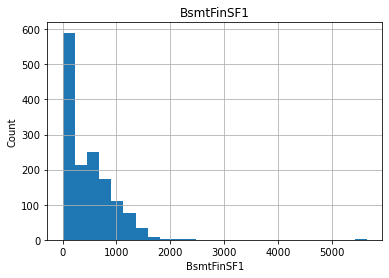

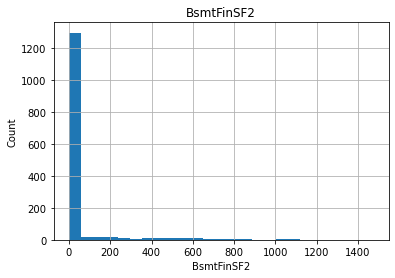

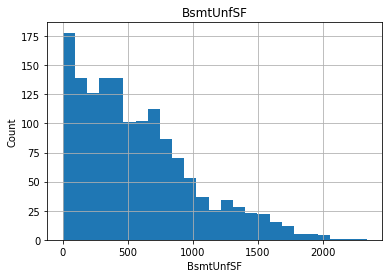

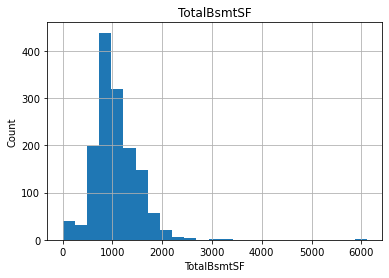

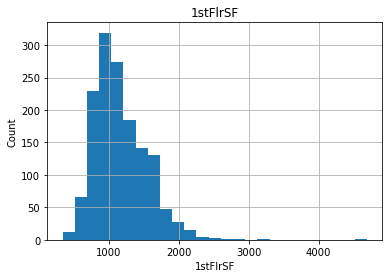

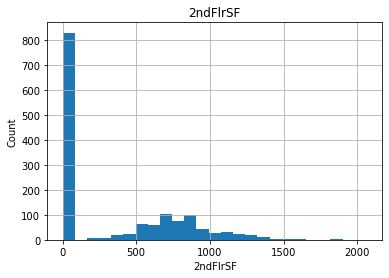

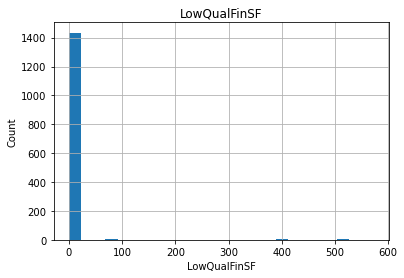

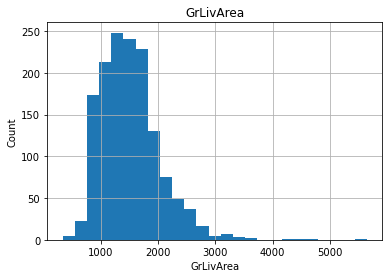

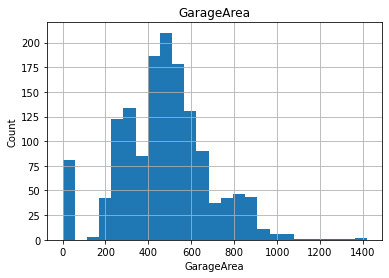

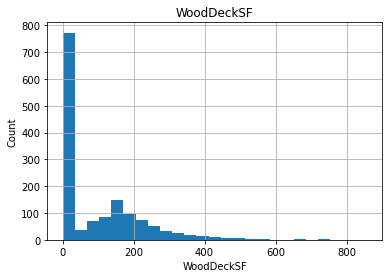

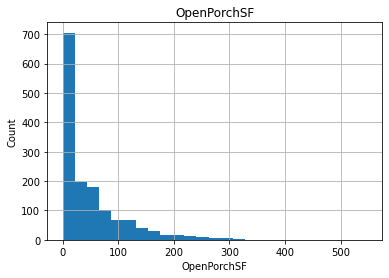

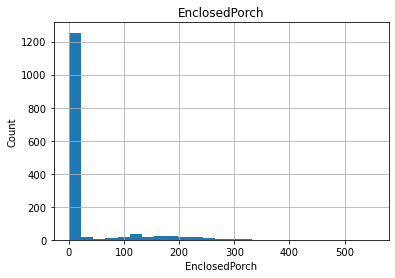

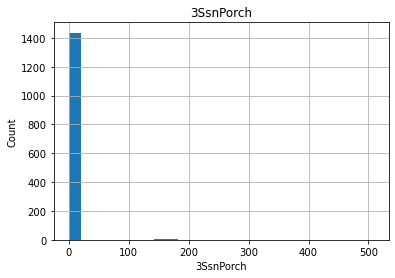

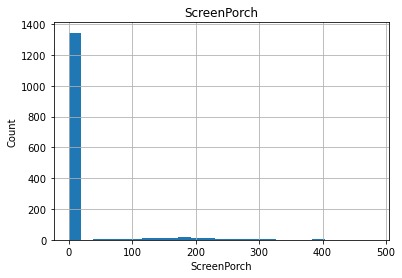

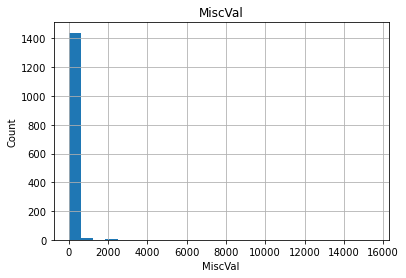

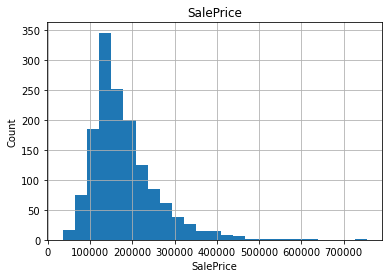

In [11]:
# How are these Continous features distributed ?
# Histograms will help us get the distribution of the data.

for feature in continous_features:
    house_data=housing_data.copy()
    house_data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Some of the Continous numerical features are skewed. To get it to the normal distribution, we can transform it logarithmically.
This will help us better gauge the relationship of continous numerical features with the 'SalePrice'

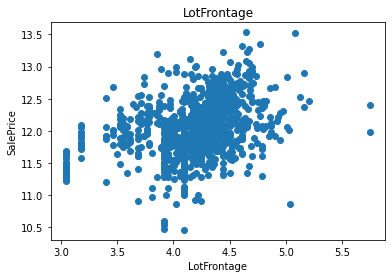

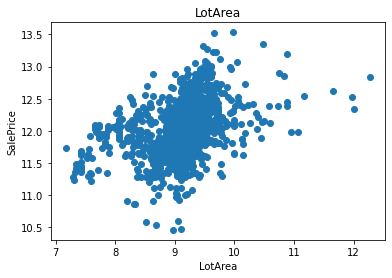

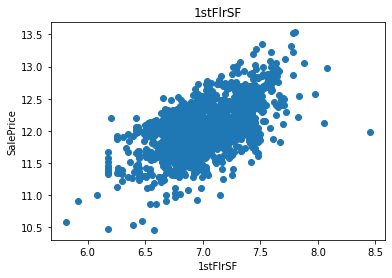

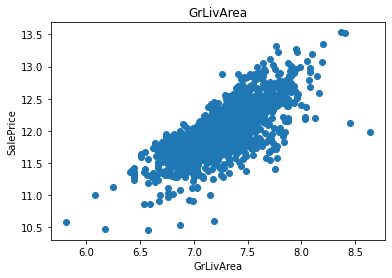

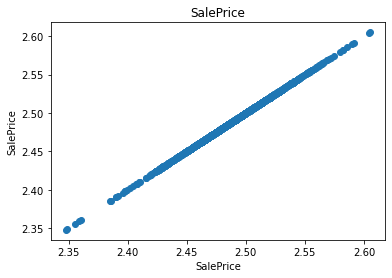

In [12]:
# Applying log transform for continous features and plotting against the log of 'SalePrice' will help us understand the relationship
# between features and the dependent variable.

for feature in continous_features:
    house_data=housing_data.copy()
    if 0 in house_data[feature].unique():
        pass
    else:
        house_data[feature]=np.log(house_data[feature])
        house_data['SalePrice']=np.log(house_data['SalePrice'])
        plt.scatter(house_data[feature], house_data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

This gives a sneak peak into the relationship between a few continous numerical features and 'SalePrice'.
Note: The last plot is straight line as 'SalePrice' is plotted against itself.

##### 4. Outliers

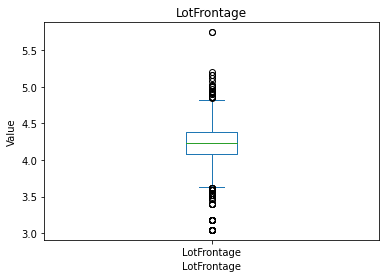

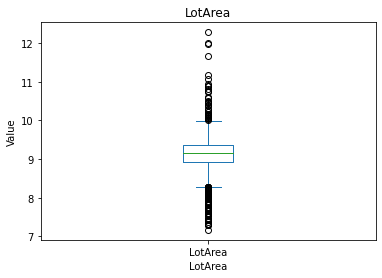

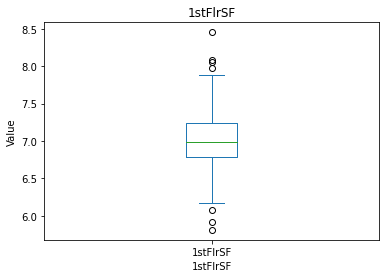

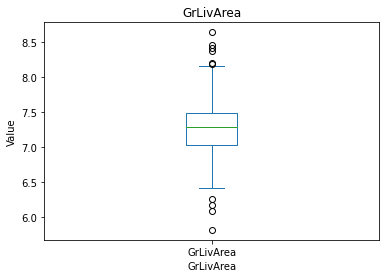

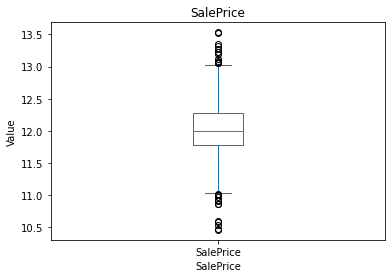

In [13]:
# Would these continous features have outliers? 
# Let's find that out with box plots

for feature in continous_features:
    house_data=housing_data.copy()
    if 0 in house_data[feature].unique():
        pass
    else:
        house_data[feature]=np.log(house_data[feature])
        house_data[feature].plot.box()
        plt.xlabel(feature)
        plt.ylabel('Value')
        plt.title(feature)
        plt.show()

There are Outlies as can be clearly seen in the box plot representations. We need to manage this in the feature engineering phase

##### 5. Categorical Features

In [14]:
categorical_features = [feature for feature in housing_data.columns if housing_data[feature].dtype == 'O']
print('Number of Categorical features: {}'.format(len(categorical_features)))

housing_data[categorical_features].head()

Number of Categorical features: 43


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


##### 6. Cardinality of Categorical Features

In [15]:
# Let's get the number of categories in each of these columns
for feature in categorical_features:
    print('For the feature {}, Catergories are {}'.format(feature, len(housing_data[feature].unique())))

For the feature MSZoning, Catergories are 5
For the feature Street, Catergories are 2
For the feature Alley, Catergories are 3
For the feature LotShape, Catergories are 4
For the feature LandContour, Catergories are 4
For the feature Utilities, Catergories are 2
For the feature LotConfig, Catergories are 5
For the feature LandSlope, Catergories are 3
For the feature Neighborhood, Catergories are 25
For the feature Condition1, Catergories are 9
For the feature Condition2, Catergories are 8
For the feature BldgType, Catergories are 5
For the feature HouseStyle, Catergories are 8
For the feature RoofStyle, Catergories are 6
For the feature RoofMatl, Catergories are 8
For the feature Exterior1st, Catergories are 15
For the feature Exterior2nd, Catergories are 16
For the feature MasVnrType, Catergories are 5
For the feature ExterQual, Catergories are 4
For the feature ExterCond, Catergories are 5
For the feature Foundation, Catergories are 6
For the feature BsmtQual, Catergories are 5
For t

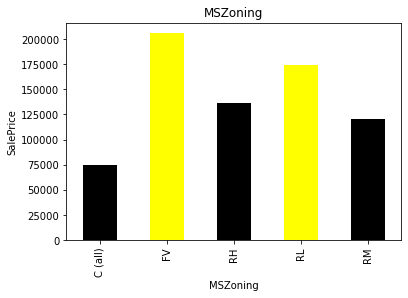

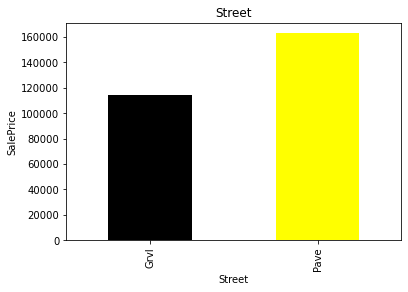

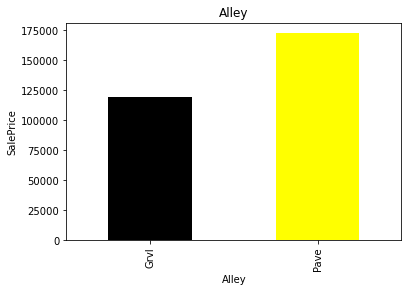

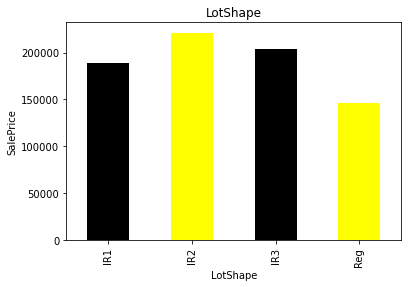

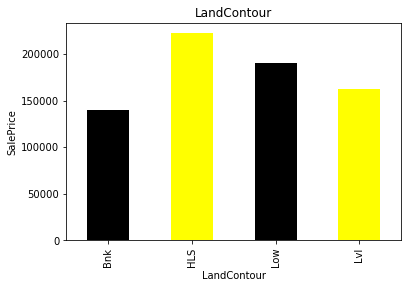

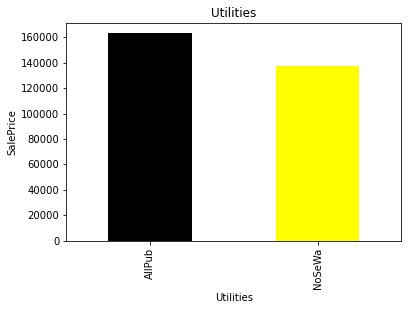

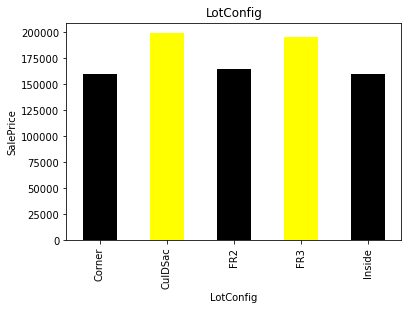

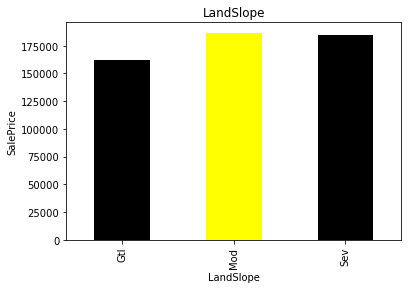

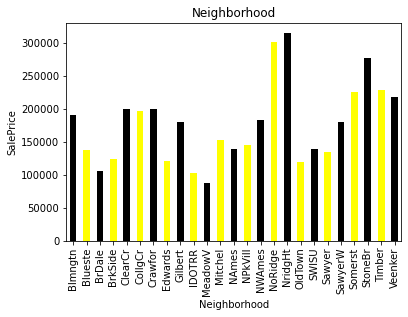

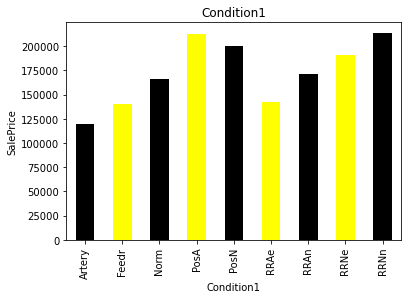

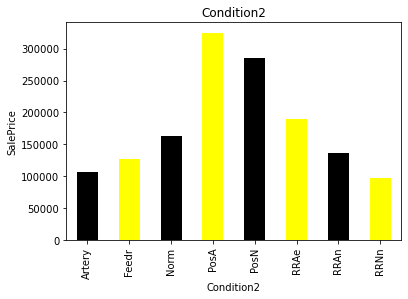

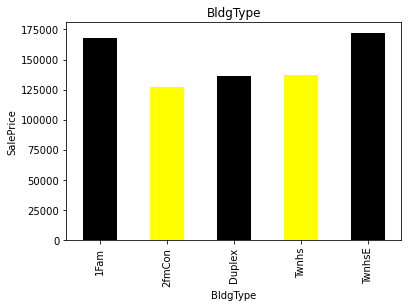

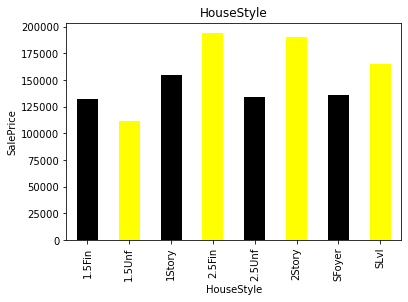

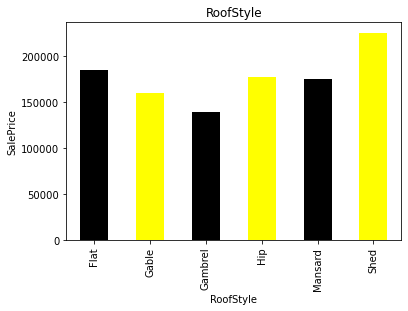

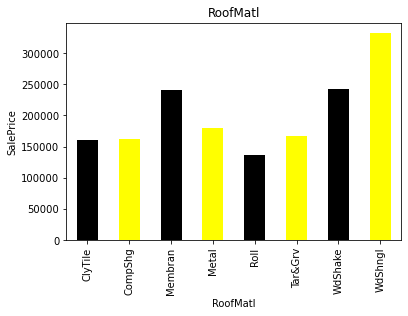

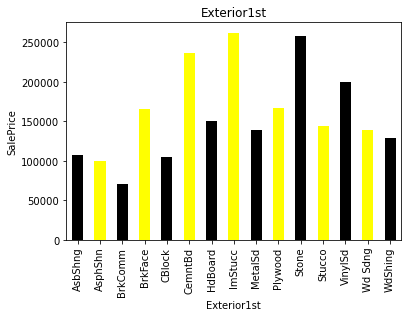

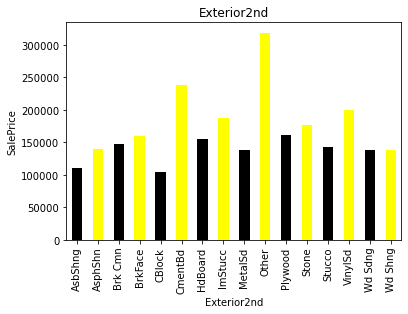

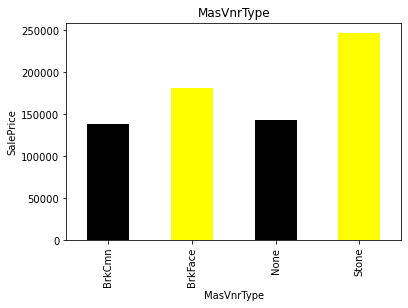

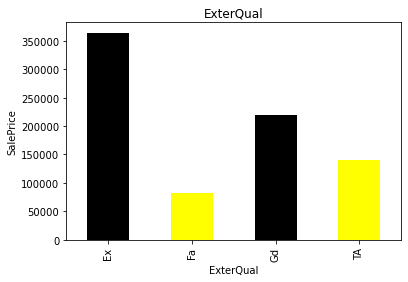

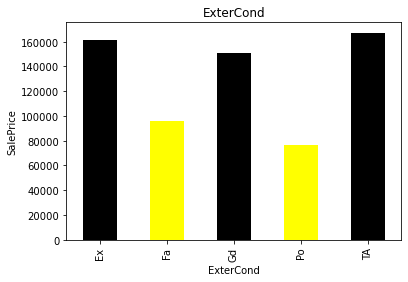

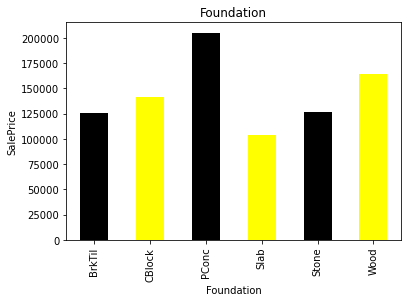

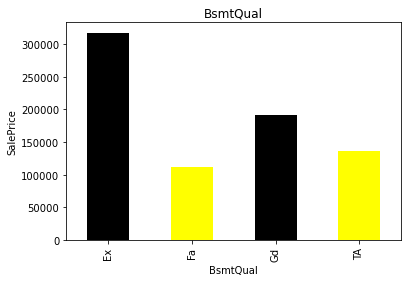

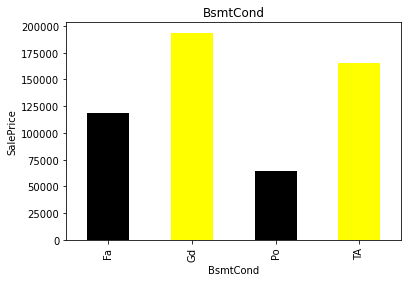

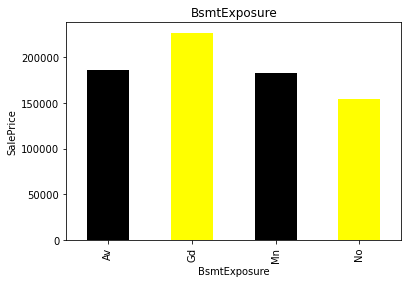

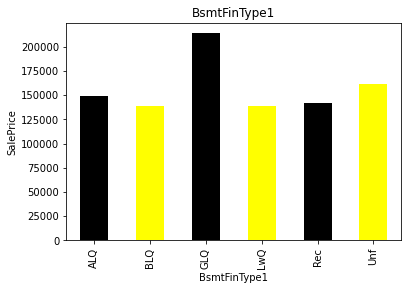

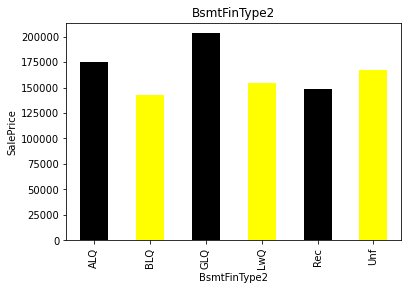

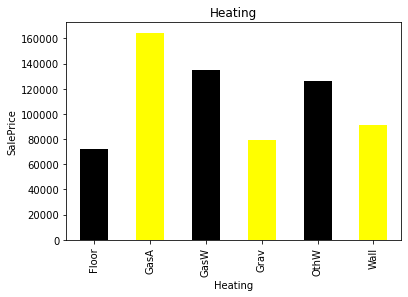

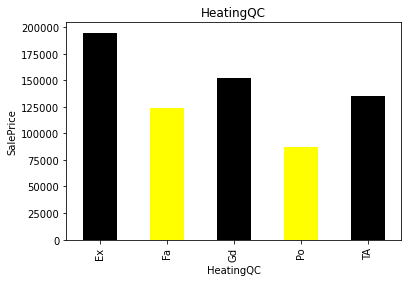

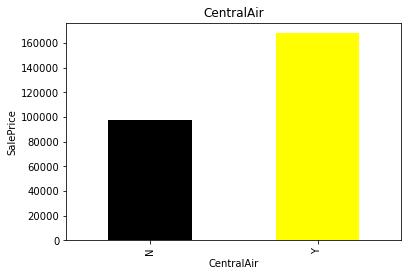

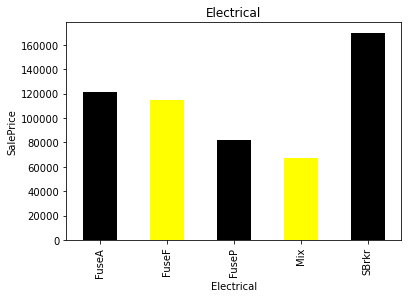

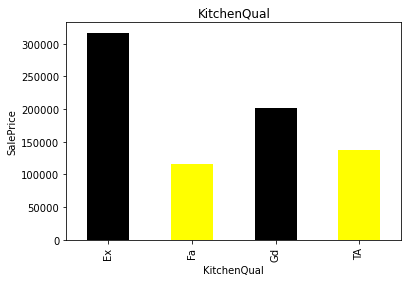

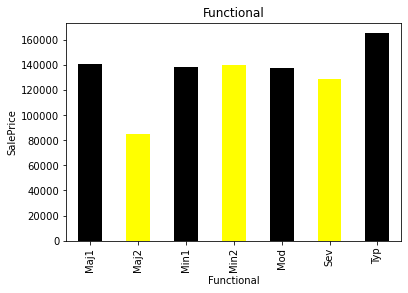

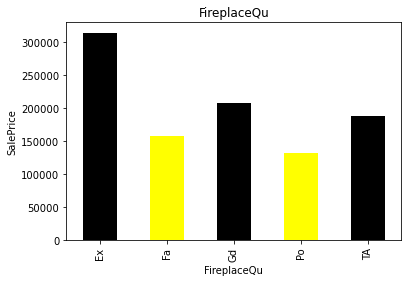

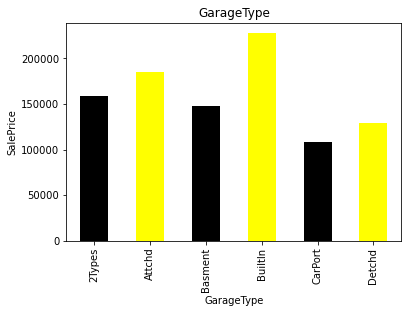

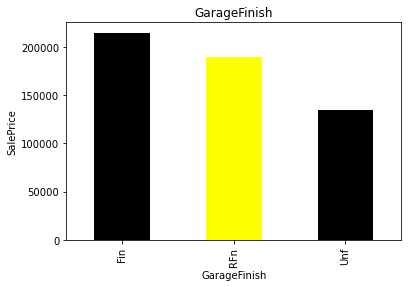

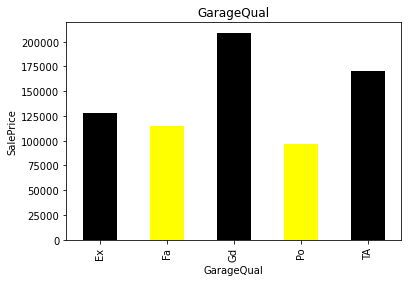

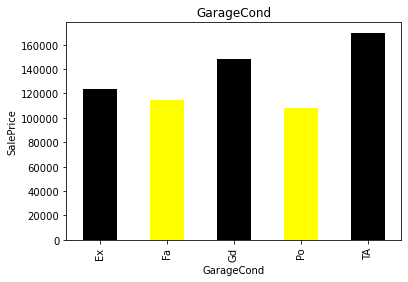

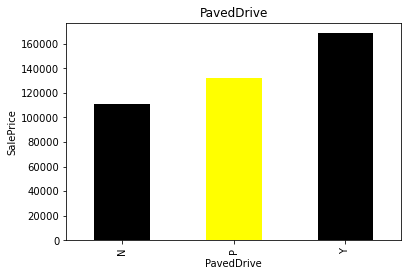

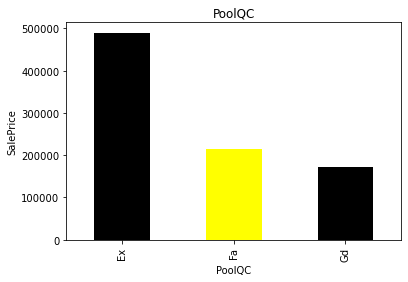

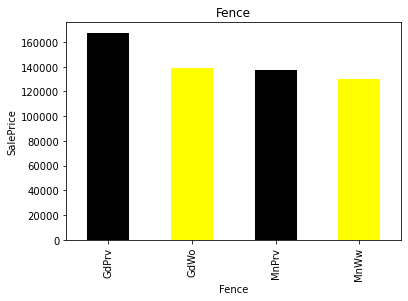

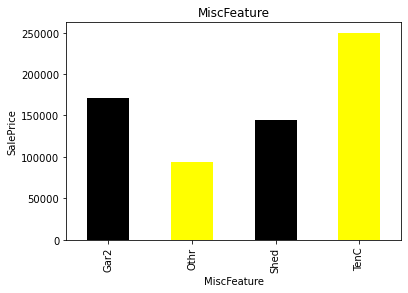

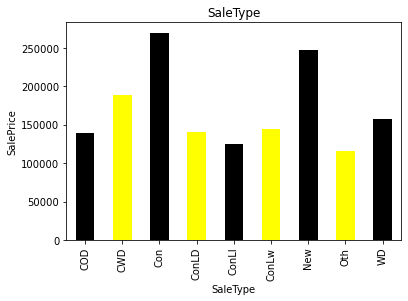

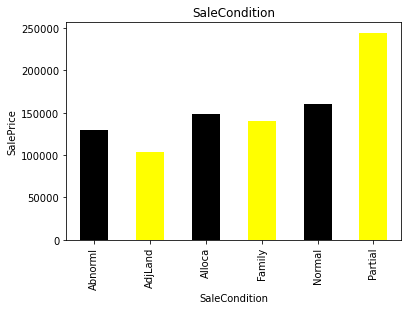

In [16]:
# Let's see the relationship between the categorical variables and the dependent variable

for feature in categorical_features:
    house_data=housing_data.copy()
    house_data.groupby(feature)['SalePrice'].median().plot.bar(color=['Black','Yellow'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

The plots convey the effect of categorical variables on the SalePrice. Some of these need to be encoded in the next phase

##### 7. Temporal Variables (DateTime)

In this case, the featues that has year in it.
We already have got a list of features that has Year mentioned in them. 
We'll use that to understand its relationships better

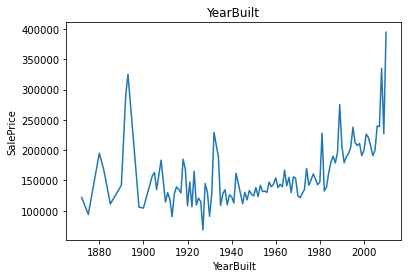

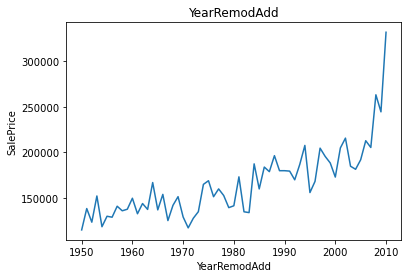

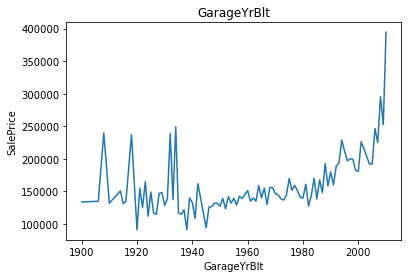

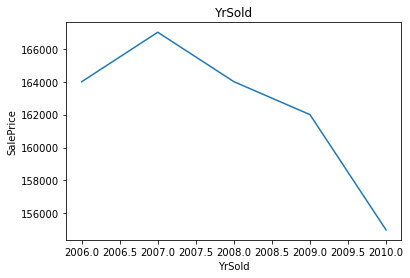

In [17]:
# Let's rewind back a little to check if the features with Year has any effect on the SalePrice

for feature in year_feature:
    house_data=housing_data.copy()
    house_data.groupby(feature)['SalePrice'].median().plot()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

Interesting observation to be made here. The SalePrice is decreasing with the YrSold.
This is counter-intutive to the general norm that the price of the house appreciates every year.

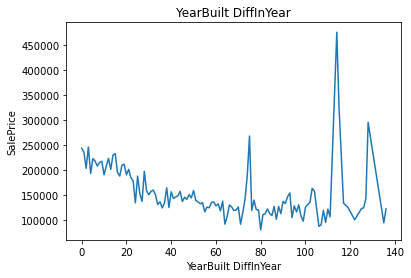

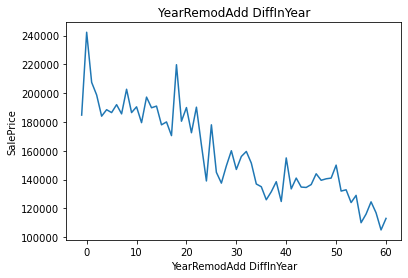

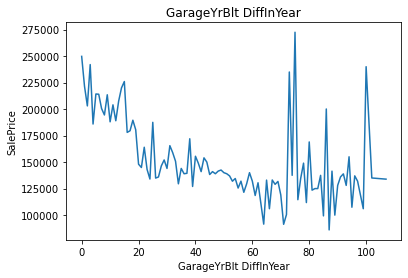

In [18]:
# to understand, lets see the age of house (difference between selling year and the built year) and also age since modifications like building garage

for feature in year_feature:
    if feature != 'YrSold':
        house_data=housing_data.copy()

        house_data['DiffInYear'] = house_data['YrSold']-house_data[feature]
        house_data.groupby('DiffInYear')['SalePrice'].median().plot()
        plt.xlabel(feature+' DiffInYear')
        plt.ylabel('SalePrice')
        plt.title(feature+' DiffInYear')
        plt.show()

It can be seen that 
1. The recent the remodification of the house, the higher the Sale Price
2. Older the garages, more the price of the house.

Something interesting to note as far as the real estate business and human psycology is concerned

### Next up is to do Feature engineering that can aid in better selection of the features